In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import  os
warnings.filterwarnings('ignore')

In [88]:
# 웹 스크래핑 가능 유무 확인을 위한 모듈 탑재
import requests

In [89]:
# 웹 스트래핑 대상 주소 저장
url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'

In [90]:
# HTTP 요청을 대상 주소롤 보내고, HTTP 응답 받아서 저장
page = requests.get(url)

# 응답 내용 확인
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [99]:
# 헤더 정보 설정
# Mozilla/5.0 (Windows NT 10.0; Win64; x64)
my_headers = {'User-agent' : 'Mozilla/5.0'}
# my_headers = {'User-agent' : ('Mozilla/5.0 (Windows NT 10.0;Win64; x64')}

In [100]:
# 요청 헤더 설정하여 HTTP 응답 받기
page = requests.get(url, headers=my_headers)

# 응답 내용 확인
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240618155848/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240618155848/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240618155848/css/finance_header.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240618155848/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240618155848/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240618155848/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240618155848/css/newstock3.css">
<link rel="stylesheet" type

In [101]:
#  HTML 페이지에서 테이블 추출
pages = pd.read_html(page.text)

# 추출한 데이터 타입 확인
type(page)

requests.models.Response

In [102]:
len(pages)

2

In [103]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.06.12,76500.0,"상승 1,300",75300.0,77100.0,75200.0,19246725.0
2,2024.06.11,75200.0,하락 500,75900.0,76000.0,75100.0,16971175.0
3,2024.06.10,75700.0,"하락 1,600",76100.0,76600.0,75600.0,14598755.0
4,2024.06.07,77300.0,하락 100,78400.0,78600.0,77100.0,21189349.0
5,2024.06.05,77400.0,"상승 2,100",78000.0,78000.0,76800.0,23177968.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024.06.04,75300.0,하락 400,74900.0,76100.0,74900.0,14098053.0


In [104]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [105]:
# 여러 페이지에 담긴 데이터 가져오기
# https://finance.naver.com/item/sise_day.naver?code=005930&page=2
# 이 방법을 쿼리 문자열(Query String) 혹은 URL 매개변수(파라메터Parameter)라고 부름
# - 쿼리 문자열 : URL 끝에서 물음표 기호(?)로 시작
# - 매개변수 이름과 값을 이름=값 형식으로 표기함 
# - 매개변수가 여러 개인 경우, 앰퍼샌드 기호(&)를 사용해 구분

# 2개의 매개변수를 보내고 있는 URL : code=005930&page=2
# 코드(code) : 현재 선택한 종목을 나타내는 정보 
# 페이지(page) : 현재 출력하고 있는 페이지를 뜻함
# 여러 페이지 정보를 가져오려면 매개변수 페이지 숫자를 증가하면서 데이터를 축적하면 됨

# 페이지 번호를 제외한 주소 저장
nurl = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='

# 데이터를 축적할 데이터프레임 생성
alltables = pd.DataFrame()

In [106]:
# 페이지 번호 증가용 반복문
for page_number in range(1, 2):
    # 페이지 번호 추가한 주소 완성
    fullurl = nurl + str(page_number)
    # 주소 확인
    print(f'{page_number} 번째 페이지 읽어오기({fullurl})')
    #HTTP 요청 전송 후 응답 받기
    page = requests.get(fullurl, headers=my_headers)
    # try:
    #     page = requests.get(fullurl, headers=my_headers)
    #     # 테이블 추출
    #     table = pd.read_html(page.text)[0]
    #     # 수상할 내용 확인
    #     print(f'전체 {len(alltables.index)} 줄에 {len(table.index)} 줄 추가')

    #     # 데이터 축적용 데이터프레임에 테이블 추가
    #     alltables = pd.concat([alltables, table])
    # except requests.exceptions.RequestException as e:
    #     print(f'HTTP 요청 중 오류 발생: {e}')
    # 테이블 추출
    table = pd.read_html(page.text)[0]
    # 수상할 내용 확인
    print(f'전체 {len(alltables.index)} 줄에 {len(table.index)} 줄 추가')

    # 데이터 축적용 데이터프레임에 테이블 추가
    alltables = pd.concat([alltables, table])
    

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄 추가


In [107]:
# 결과 확인
alltables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.06.26,80600.0,하락 200,80100.0,81000.0,79900.0,7632518.0
2,2024.06.25,80800.0,상승 200,80600.0,81800.0,80100.0,19088458.0
3,2024.06.24,80600.0,상승 600,79700.0,80900.0,79500.0,15454227.0
4,2024.06.21,80000.0,"하락 1,600",80700.0,80800.0,80000.0,17907523.0
5,2024.06.20,81600.0,상승 400,81500.0,82200.0,81200.0,20288913.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024.06.19,81200.0,"상승 1,400",81100.0,82500.0,80500.0,24168863.0


In [108]:
# 결측치 제거
alltables.dropna(inplace = True)
alltables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.06.26,80600.0,하락 200,80100.0,81000.0,79900.0,7632518.0
2,2024.06.25,80800.0,상승 200,80600.0,81800.0,80100.0,19088458.0
3,2024.06.24,80600.0,상승 600,79700.0,80900.0,79500.0,15454227.0
4,2024.06.21,80000.0,"하락 1,600",80700.0,80800.0,80000.0,17907523.0
5,2024.06.20,81600.0,상승 400,81500.0,82200.0,81200.0,20288913.0
9,2024.06.19,81200.0,"상승 1,400",81100.0,82500.0,80500.0,24168863.0
10,2024.06.18,79800.0,"상승 1,700",78700.0,80200.0,78600.0,18207598.0
11,2024.06.17,78100.0,"하락 1,500",79200.0,79500.0,78000.0,16123051.0
12,2024.06.14,79600.0,"상승 1,000",79700.0,80500.0,79000.0,22926612.0
13,2024.06.13,78600.0,"상승 2,100",78400.0,79000.0,77800.0,33763804.0


In [109]:
# 데이터를 축적할 데이터프레임 생성
alltables = pd.DataFrame()

In [112]:
# 페이지 번호 증가용 반복문
for page_number in range(1, 11):
    # 페이지 번호 추가한 주소 완성
    fullurl = nurl + str(page_number)
    # 주소 확인
    print(f'{page_number} 번째 페이지 읽어오기 ({fullurl})')
    # HTTP 요청 전송 후 응답 받아오기
    page = requests.get(fullurl, headers=my_headers)
    # 테이블 추출
    table = pd.read_html(page.text)[0]
    # 수행할 내용 확인
    print(f'전체 {len(alltables.index)} 줄에 {len(table.index)} 줄 추가')
    # 데이터 축적용 데이터프레임에 테이블 추가
    alltables = pd.concat([alltables, table])

1 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄 추가
2 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
전체 15 줄에 15 줄 추가
3 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=3)
전체 30 줄에 15 줄 추가
4 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=4)
전체 45 줄에 15 줄 추가
5 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=5)
전체 60 줄에 15 줄 추가
6 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=6)
전체 75 줄에 15 줄 추가
7 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=7)
전체 90 줄에 15 줄 추가
8 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=8)
전체 105 줄에 15 줄 추가
9 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=9)
전체 120 줄에 15 줄 추가
10 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=005930&page=10)
전체 135 줄에 15 줄 추가


In [114]:
# 결측치 제거
alltables.dropna(inplace=True)
alltables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.06.26,80500.0,하락 300,80100.0,81000.0,79900.0,7696399.0
2,2024.06.25,80800.0,상승 200,80600.0,81800.0,80100.0,19088458.0
3,2024.06.24,80600.0,상승 600,79700.0,80900.0,79500.0,15454227.0
4,2024.06.21,80000.0,"하락 1,600",80700.0,80800.0,80000.0,17907523.0
5,2024.06.20,81600.0,상승 400,81500.0,82200.0,81200.0,20288913.0
...,...,...,...,...,...,...,...
9,2024.02.02,75200.0,"상승 1,600",74000.0,75200.0,73700.0,14955881.0
10,2024.02.01,73600.0,상승 900,73000.0,74200.0,72900.0,19881033.0
11,2024.01.31,72700.0,"하락 1,600",73400.0,74000.0,72500.0,15703560.0
12,2024.01.30,74300.0,하락 100,75000.0,75300.0,73700.0,12244418.0


In [116]:
# 열 이름 영문으로 변경
alltables.rename(columns = {'날짜': 'data', '종가':'end_price',
                            '시가':'start_price', '고가':'highest_price', 
                            '저가':'lowest_price'}, inplace = True)
alltables

,data,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2024.06.26,80500.0,하락 300,80100.0,81000.0,79900.0,7696399.0
2,2024.06.25,80800.0,상승 200,80600.0,81800.0,80100.0,19088458.0
3,2024.06.24,80600.0,상승 600,79700.0,80900.0,79500.0,15454227.0
4,2024.06.21,80000.0,"하락 1,600",80700.0,80800.0,80000.0,17907523.0
5,2024.06.20,81600.0,상승 400,81500.0,82200.0,81200.0,20288913.0
...,...,...,...,...,...,...,...
9,2024.02.02,75200.0,"상승 1,600",74000.0,75200.0,73700.0,14955881.0
10,2024.02.01,73600.0,상승 900,73000.0,74200.0,72900.0,19881033.0
11,2024.01.31,72700.0,"하락 1,600",73400.0,74000.0,72500.0,15703560.0
12,2024.01.30,74300.0,하락 100,75000.0,75300.0,73700.0,12244418.0


In [117]:
# 불필요 열 제거
alltables.drop(['전일비', '거래량'], axis = 1, inplace = True)
alltables

,data,end_price,start_price,highest_price,lowest_price
1,2024.06.26,80500.0,80100.0,81000.0,79900.0
2,2024.06.25,80800.0,80600.0,81800.0,80100.0
3,2024.06.24,80600.0,79700.0,80900.0,79500.0
4,2024.06.21,80000.0,80700.0,80800.0,80000.0
5,2024.06.20,81600.0,81500.0,82200.0,81200.0
...,...,...,...,...,...
9,2024.02.02,75200.0,74000.0,75200.0,73700.0
10,2024.02.01,73600.0,73000.0,74200.0,72900.0
11,2024.01.31,72700.0,73400.0,74000.0,72500.0
12,2024.01.30,74300.0,75000.0,75300.0,73700.0


In [119]:
# 중앙값 열 추가
alltables['median_price'] = alltables['highest_price'] - ((alltables['highest_price'] - 
                                                            alltables['lowest_price']) /2)
alltables

,data,end_price,start_price,highest_price,lowest_price,median_price
1,2024.06.26,80500.0,80100.0,81000.0,79900.0,80450.0
2,2024.06.25,80800.0,80600.0,81800.0,80100.0,80950.0
3,2024.06.24,80600.0,79700.0,80900.0,79500.0,80200.0
4,2024.06.21,80000.0,80700.0,80800.0,80000.0,80400.0
5,2024.06.20,81600.0,81500.0,82200.0,81200.0,81700.0
...,...,...,...,...,...,...
9,2024.02.02,75200.0,74000.0,75200.0,73700.0,74450.0
10,2024.02.01,73600.0,73000.0,74200.0,72900.0,73550.0
11,2024.01.31,72700.0,73400.0,74000.0,72500.0,73250.0
12,2024.01.30,74300.0,75000.0,75300.0,73700.0,74500.0


In [120]:
# 월 정보 열 추가
alltables['month'] = alltables['data'].str[0:7]
alltables

,data,end_price,start_price,highest_price,lowest_price,median_price,month
1,2024.06.26,80500.0,80100.0,81000.0,79900.0,80450.0,2024.06
2,2024.06.25,80800.0,80600.0,81800.0,80100.0,80950.0,2024.06
3,2024.06.24,80600.0,79700.0,80900.0,79500.0,80200.0,2024.06
4,2024.06.21,80000.0,80700.0,80800.0,80000.0,80400.0,2024.06
5,2024.06.20,81600.0,81500.0,82200.0,81200.0,81700.0,2024.06
...,...,...,...,...,...,...,...
9,2024.02.02,75200.0,74000.0,75200.0,73700.0,74450.0,2024.02
10,2024.02.01,73600.0,73000.0,74200.0,72900.0,73550.0,2024.02
11,2024.01.31,72700.0,73400.0,74000.0,72500.0,73250.0,2024.01
12,2024.01.30,74300.0,75000.0,75300.0,73700.0,74500.0,2024.01


In [121]:
# 날짜를 인덱스로 설정
alltables.set_index('data', inplace = True)

# 날짜 오름차순 정렬
alltables.sort_index(inplace = True)
alltables

,end_price,start_price,highest_price,lowest_price,median_price,month
data,,,,,,
2024.01.29,74400.0,73800.0,75200.0,73500.0,74350.0,2024.01
2024.01.30,74300.0,75000.0,75300.0,73700.0,74500.0,2024.01
2024.01.31,72700.0,73400.0,74000.0,72500.0,73250.0,2024.01
2024.02.01,73600.0,73000.0,74200.0,72900.0,73550.0,2024.02
2024.02.02,75200.0,74000.0,75200.0,73700.0,74450.0,2024.02
...,...,...,...,...,...,...
2024.06.20,81600.0,81500.0,82200.0,81200.0,81700.0,2024.06
2024.06.21,80000.0,80700.0,80800.0,80000.0,80400.0,2024.06
2024.06.24,80600.0,79700.0,80900.0,79500.0,80200.0,2024.06


<Axes: xlabel='data'>

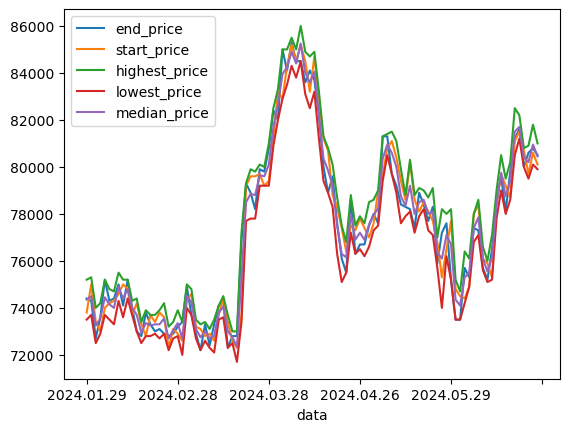

In [122]:
alltables.plot.line()

<Axes: xlabel='data'>

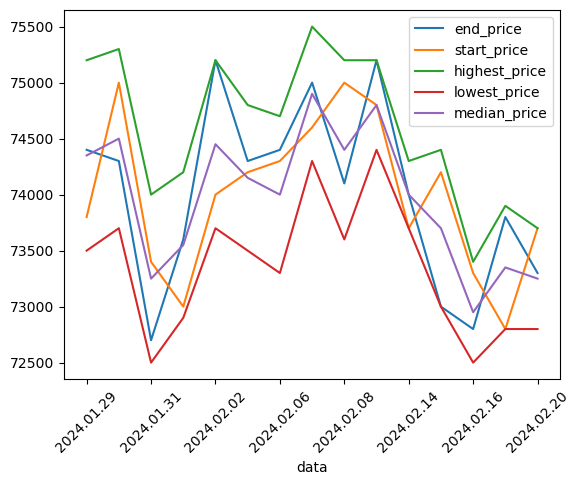

In [123]:
alltables[:15].plot.line(rot=45)

<Axes: title={'center': 'median_price'}, xlabel='[month]'>

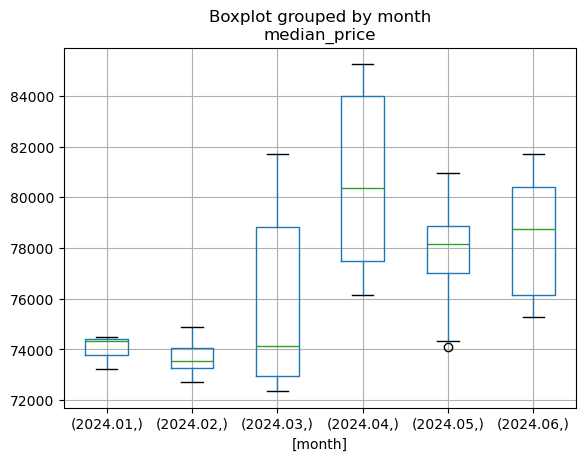

In [124]:
alltables.boxplot(column = ['median_price'], by=['month'])

<Axes: title={'center': 'end_price'}, xlabel='[month]'>

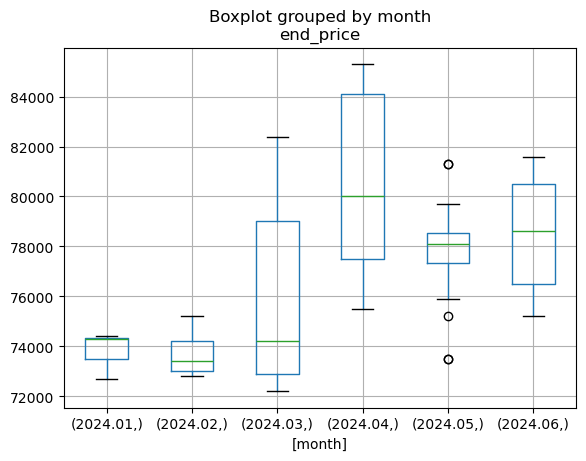

In [125]:
alltables.boxplot(column = ['end_price'], by=['month'])